<a href="https://colab.research.google.com/github/blockmoo/python_tutoring/blob/main/Binomial_Option_Pricing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://www.josephthurman.com/binomial3.html

In [ ]:
import math

def first_binomial_call(S, K, T, r, u, d, N):
    dt = T/N
    p = (math.exp(r * dt) - d)/(u - d)
    C = {}
    for m in range(0, N+1):
            C[(N, m)] = max(S * (u ** (m)) * (d ** (N-m)) - K, 0)
    for k in range(N-1, -1, -1):
        for m in range(0,k+1):
            C[(k, m)] = math.exp(-r * dt) * (p * C[(k+1, m+1)] + (1-p) * C[(k+1, m)])
    return C[(0,0)]

In [ ]:
first_binomial_call(100, 100, 1, 0, 1.2, 0.8, 1)

10.0

In [ ]:
for N in [1,10,100,200,300,400,500]:
    print("With N = {:3d}, the price is {:.2f}".format(N,first_binomial_call(100, 100, 1, 0, 1.2, 0.8, N)))

With N =   1, the price is 10.00
With N =  10, the price is 25.62
With N = 100, the price is 68.55
With N = 200, the price is 84.56
With N = 300, the price is 91.90
With N = 400, the price is 95.61
With N = 500, the price is 97.58


In [ ]:
def binomial_call(S, K, T, r, vol, N):
    """
    Implements the binomial option pricing model to price a European call option on a stock
    S - stock price today
    K - strike price of the option
    T - time until expiry of the option
    r - risk-free interest rate
    vol - the volatility of the stock
    N - number of steps in the model
    """
    dt = T/N
    u =  math.exp(vol * math.sqrt(dt))
    d = 1/u
    p = (math.exp(r * dt) - d)/(u - d)
    C = {}
    for m in range(0, N+1):
            C[(N, m)] = max(S * (u ** (2*m - N)) - K, 0)
    for k in range(N-1, -1, -1):
        for m in range(0,k+1):
            C[(k, m)] = math.exp(-r * dt) * (p * C[(k+1, m+1)] + (1-p) * C[(k+1, m)])
    return C[(0,0)]

In [ ]:
for N in [1,2,10,100,200,300,400,500]:
    print("With {:3d} steps, the price is {:.2f}".format(N,binomial_call(100, 100, 1, 0, math.log(1.2), N)))

With   1 steps, the price is 9.09
With   2 steps, the price is 6.44
With  10 steps, the price is 7.08
With 100 steps, the price is 7.25
With 200 steps, the price is 7.25
With 300 steps, the price is 7.26
With 400 steps, the price is 7.26
With 500 steps, the price is 7.26


https://wikidocs.net/80643     in Rcode

In [ ]:
function BTEPut(S0,K,r,sigma,T,M)

# Binomial European Put Option Pricing based on CRR(1979)
# Author : SeongDeok Ko
# S0 : Time zero Stock price
# K : Strike price
# r : Annualised Risk Free rate of return
# sigma : Annualised volatility of return
# T : Time
# M : Number of period of tree

dt = T/M ;
u = exp( sigma * sqrt(dt) ) ; 
d = 1/u ; 
q = (exp(r * dt) - d) / (u-d) ;
DF = exp(-r*dt);
S = zeros(M +1 , 1); 
S[1] = S0 * u^M ; 

for j = 1:M
    S[j+1] = S(j) * d /u ;
end

PF = max.(K .-S,0); # Julia에서는 max(S -K,0) 이렇게 하면 안 돌아갑니다. 

for j = 1:M
           S[j+1] = S[j] * d /u ;
end
for i = M:-1:1
           for j = 0:(i-1)
               PF[ M+1 - j,1] = DF * ( q * PF[M-j, 1 ] + (1-q) * PF[M+1-j,1] );
           end
end
return PF[end]

SyntaxError: ignored

https://www.youtube.com/watch?v=lSnWkQYbWyA

In [ ]:
import numpy as np
import time

In [ ]:
def binom_tree_call(N, T, S0, sigma, r, K, array_out=False):
  #Init
  dt = T/N
  u = np.exp(sigma*np.sqrt(dt))
  d = 1/u
  p = (np.exp(r*dt) - d)/(u-d)

  #price tree
  price_tree = np.zeros([N+1, N+1])

  for i in range(N+1):
    for j in range(i+1):
      price_tree[j, i] = S0*(d**j)*(u**(i-j))

  # Option value
  option = np.zeros([N+1, N+1])
  option[:, N] = np.maximum(np.zeros(N+1), price_tree[:, N]-K)

  # Calculate option price at t=0
  for i in np.arange(N-1, -1, -1):
    for j in np.arange(0, i+1):
      option[j, i] = np.exp(-r*dt)*(p*option[j, i+1]+(1-p)*option[j+1, i+1])

      #Return
      if array_out:
        return [option[0, 0], price_tree, option]
      else:
        return option[0, 0]

In [ ]:
binom_tree_call(50, 1, 100, 0.1, 0.05, 100, True)

[0.0, array([[100.        , 101.42426087, 102.86880693, ..., 197.15548787,
         199.96349633, 202.81149816],
        [  0.        ,  98.59573946, 100.        , ..., 191.65721247,
         194.38691115, 197.15548787],
        [  0.        ,   0.        ,  97.2111984 , ..., 186.31227307,
         188.96584587, 191.65721247],
        ...,
        [  0.        ,   0.        ,   0.        , ...,  50.72138802,
          51.4437929 ,  52.17648671],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
          50.00912758,  50.72138802],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,  49.30686914]]), array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
         100.06344635, 102.81149816],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,  97.15548787],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,  91.65721247],
        .

In [ ]:
start_time = time.time()
for i in range(1000):
  binom_tree_call(50, 1, 100, 0.1, 0.05, 100, True)
end_time = time.time()
print(end_time - start_time)

1.899461269378662


In [ ]:
@autojit
def binom_tree_call_put(N, T, S0, sigma, r, K, call=True, array_out=False):
  #Init
  dt = T/N
  u = np.exp(sigma*np.sqrt(dt))
  d = 1/u
  p = (np.exp(r*dt) - d)/(u-d)

  #price tree
  price_tree = np.zeros([N+1, N+1])

  for i in range(N+1):
    for j in range(i+1):
      price_tree[j, i] = S0*(d**j)*(u**(i-j))

  # Option value
  option = np.zeros([N+1, N+1])
  if call:
    option[:, N] = np.maximum(np.zeros(N+1), price_tree[:, N]-K)
  else:
    option[:, N] = np.maximum(np.zeros(N+1),K - price_tree[:, N])

  # Calculate option price at t=0
  for i in np.arange(N-1, -1, -1):
    for j in np.arange(0, i+1):
      option[j, i] = np.exp(-r*dt)*(p*option[j, i+1]+(1-p)*option[j+1, i+1])

      #Return
      if array_out:
        return [option[0, 0], price_tree, option]
      else:
        return option[0, 0]

In [ ]:
binom_tree_call_put(N=50, T=1, S0=100, sigma=0.2, r=0.06, K=99, call=True, array_out=False)

또다른 binomial tree python code

> https://slidetodoc.com/crr-and-american-options-date-oct-2014-authors/



In [ ]:
# Author: Victor Lopez Lopez,
# Group Members: Shedrack Lutembeka, Bo Yuan, Victor Lopez Lopez
# Binomial tree (Cox-Rox-Rubenstein) for American Option Valuation 

# Inspired on: 
# Binomial Tree for America and European options by Mehdi Bounouar
# Binomial Tree Option Valuation Cox, Ross, Rubinstein method by "www.quantandfinancial.com"
import matplotlib.pyplot as plt
import numpy as np

def Binomial(n, S, K, r, v, t, PutCall):  
    At = t/n 
    u = np.exp(v*np.sqrt(At))
    d = 1./u
    p = (np.exp(r*At)-d) / (u-d) 

    #Binomial price tree
    stockvalue = np.zeros((n+1,n+1))
    stockvalue[0,0] = S
    for i in range(1,n+1):
        stockvalue[i,0] = stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j] = stockvalue[i-1,j-1]*d
    
    #option value at final node   
    optionvalue = np.zeros((n+1,n+1))
    for j in np.arange(n+1):
        if PutCall=="C": # Call
            optionvalue[n,j] = max(0, stockvalue[n,j]-K)
        elif PutCall=="P": #Put
            optionvalue[n,j] = max(0, K-stockvalue[n,j])
    
    #backward calculation for option price    
    for i in np.arange(n-1,-1,-1):
        for j in np.arange(i+1):
                if PutCall=="P":
                    optionvalue[i,j] = max(0, K-stockvalue[i,j], np.exp(-r*At)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))
                elif PutCall=="C":
                    optionvalue[i,j] = max(0, stockvalue[i,j]-K, np.exp(-r*At)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))
    return optionvalue[0,0]



In [ ]:
    # Inputs
n = 10 #input("Enter number of binomial steps: ")           #number of steps
S = 100 #input("Enter the initial underlying asset price: ") #initial underlying asset price
r = 0.06 #input("Enter the risk-free interest rate: ")        #risk-free interest rate
K = 105 #input("Enter the option strike price: ")            #strike price
v = 0.4 #input("Enter the volatility factor: ")              #volatility
t = 1.

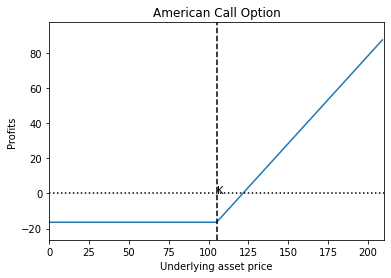

American Call Price: 16.40463895397694


In [ ]:
    #Graphs and results for the Option prices

y = [-Binomial(n, S, K, r, v, t, "C")] * (K)
y += [x - Binomial(n, S, K, r, v, t, "C") for x in range(K)] 

plt.plot(range(2*K), y)
plt.axis([0, 2*K, min(y) - 10, max(y) + 10])
plt.xlabel('Underlying asset price')
plt.ylabel('Profits')
plt.axvline(x=K, linestyle='--', color='black')
plt.axhline(y=0, linestyle=':', color='black')
plt.title('American Call Option')
plt.text(105, 0, 'K')
plt.show()

print("American Call Price: %s" %(Binomial(n, S, K, r, v, t, PutCall="C")))

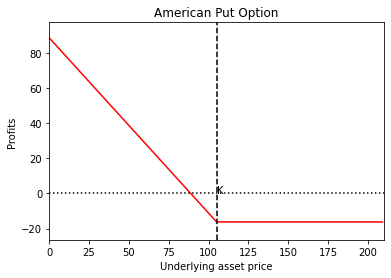

American Put Price: 16.217043453051907


In [ ]:
z = [-x + K - Binomial(n, S, K, r, v, t, "P") for x in range(K)] 
z += [-Binomial(n, S, K, r, v, t, "P")] * (K)

plt.plot(range(2*K), z, color='red')
plt.axis([0, 2*K, min(y) - 10, max(y) + 10])
plt.xlabel('Underlying asset price')
plt.ylabel('Profits')
plt.axvline(x=K, linestyle='--', color='black')
plt.axhline(y=0, linestyle=':', color='black')
plt.title('American Put Option')
plt.text(105, 0, 'K')
plt.show()

print("American Put Price: %s" %(Binomial(n, S, K, r, v, t, PutCall="P")))
    